<a href="https://colab.research.google.com/github/NicoleDavidov/DL_finalProject/blob/main/Lungn_Cancer_project_DL_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub
import kagglehub

# Download dataset (default behavior)
path = kagglehub.dataset_download("adityamahimkar/iqothnccd-lung-cancer-dataset")

print("Dataset downloaded to:", path)


100%|██████████| 199M/199M [00:09<00:00, 21.0MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Copy dataset from default location to Google Drive
!cp -r /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset /content/drive/MyDrive/KaggleDatasets/LungCancer


Mounted at /content/drive
cp: cannot create directory '/content/drive/MyDrive/KaggleDatasets/LungCancer': No such file or directory


In [3]:
import os

base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
print("Base path:", base_path)
patients = os.listdir(base_path)
patients.sort()

Base path: /root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/


In [4]:
import os
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
print("Contents of base_path:")
print(os.listdir(base_path))


Contents of base_path:
['Normal cases', 'IQ-OTH_NCCD lung cancer dataset.txt', 'Malignant cases', 'Bengin cases']


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install pydicom
import pydicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
%matplotlib inline
!pip install dicom
import dicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.3/766.3 kB 2.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [6]:
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

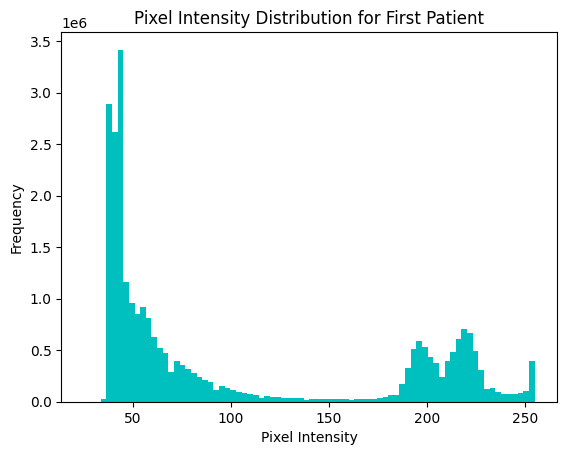

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Base path to the dataset
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
categories = os.listdir(base_path)

# Function to load and resize images
def load_images(path, target_size=(256, 256)):
    image_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith((".jpg", ".png", ".jpeg"))]
    images = []
    for file in image_files:
        img = Image.open(file).convert("L")  # Convert to grayscale
        img_resized = img.resize(target_size)  # Resize to target dimensions
        images.append(np.array(img_resized))
    return np.stack(images)  # Combine all images into a 3D array

# Find the first patient folder
first_patient_images = None
for category in categories:
    category_path = os.path.join(base_path, category)
    if os.path.isdir(category_path):  # Ensure it's a folder
        patients = os.listdir(category_path)
        patients.sort()
        if patients:
            first_patient_path = os.path.join(category_path, patients[0])
            if os.path.isdir(first_patient_path):
                first_patient_images = load_images(first_patient_path, target_size=(256, 256))
            else:
                # If images are directly in the category folder
                first_patient_images = load_images(category_path, target_size=(256, 256))
            break

# Check if images were loaded
if first_patient_images is not None:
    # Flatten and plot the histogram
    plt.hist(first_patient_images.flatten(), bins=80, color='c')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title("Pixel Intensity Distribution for First Patient")
    plt.show()
else:
    print("No images found in the dataset.")



Loading from category: Normal cases
Selected file: Normal case (100).jpg


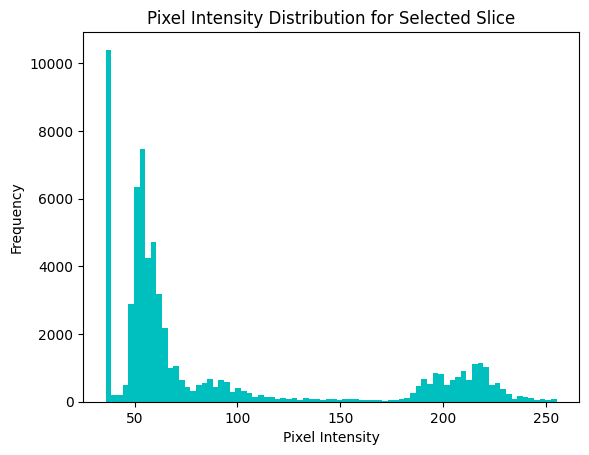

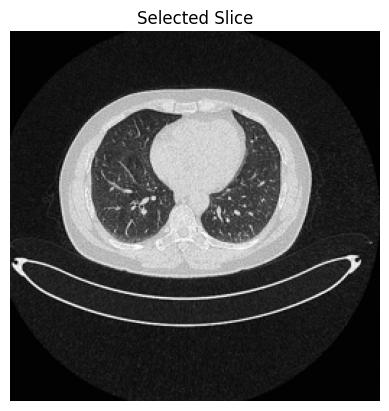

In [8]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to load image slices from a given folder
def load_scan(path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(path) if f.lower().endswith((".jpg", ".png", ".jpeg")) and f != ".DS_Store"]
    image_files.sort()  # Ensure consistent ordering
    slices = []
    for file in image_files:
        img = Image.open(os.path.join(path, file)).convert("L")  # Convert to grayscale
        img_resized = img.resize(target_size)  # Resize to target size
        slices.append(np.array(img_resized))  # Append as numpy array
    return np.stack(slices)  # Combine into a 3D array

# Base path to the dataset
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
categories = os.listdir(base_path)

# Select the first category (e.g., 'Malignant cases')
category_path = os.path.join(base_path, categories[0])  # Adjust category index if needed
print(f"Loading from category: {categories[0]}")

# Load all images from the category folder
image_files = [f for f in os.listdir(category_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
image_files.sort()

# Simulate loading the "third patient" by selecting a subset of images
# Here, we treat a single image as "a patient's slice" for simplicity
third_patient_path = os.path.join(category_path, image_files[2])  # Adjust index as needed
print(f"Selected file: {image_files[2]}")

# Load the selected image as a single slice
img = Image.open(third_patient_path).convert("L")
img_resized = img.resize((256, 256))  # Resize to ensure consistency
first_patient_pixels = np.array(img_resized)

# Plot histogram of pixel intensities
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution for Selected Slice")
plt.show()

# Show the selected slice
plt.imshow(first_patient_pixels, cmap=plt.cm.gray)
plt.axis('off')  # Remove axes
plt.title("Selected Slice")
plt.show()


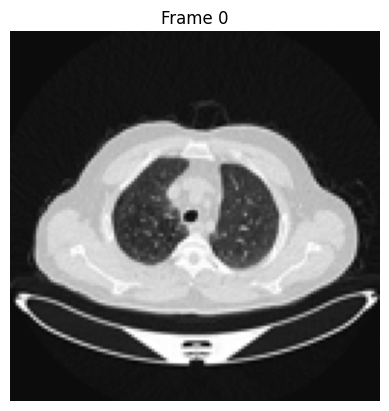

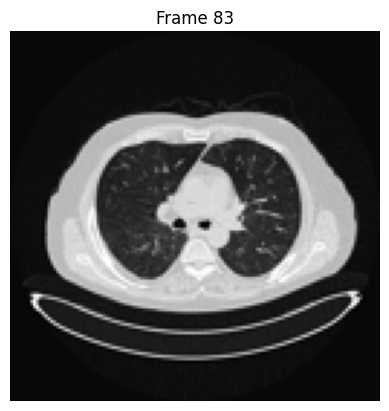

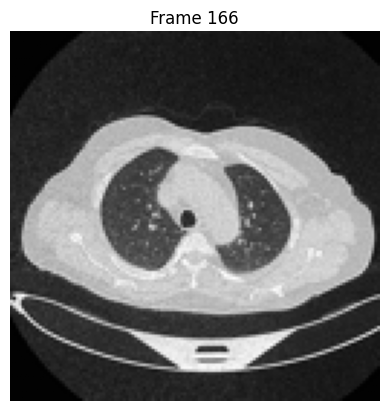

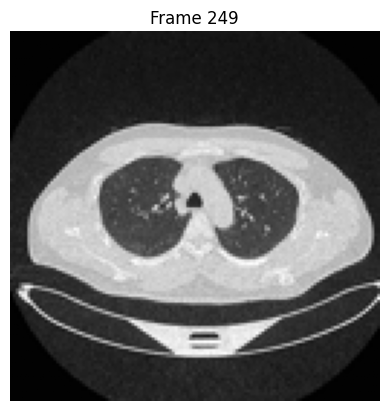

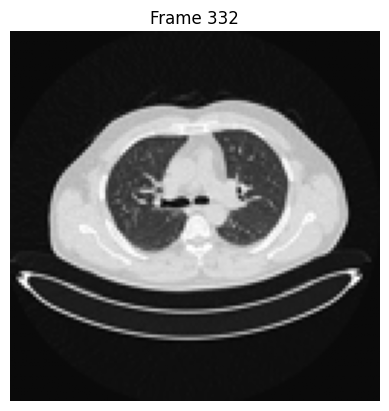

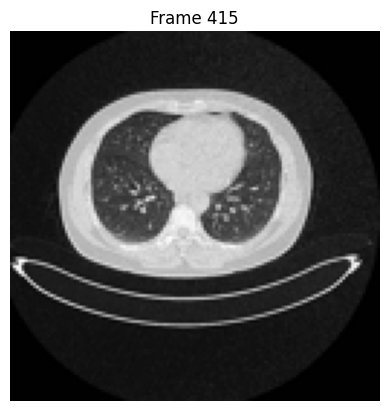

Shape before resampling: (416, 128, 128)
Shape after resampling: (416, 128, 128)
Minimum intensity: 26
Maximum intensity: 255


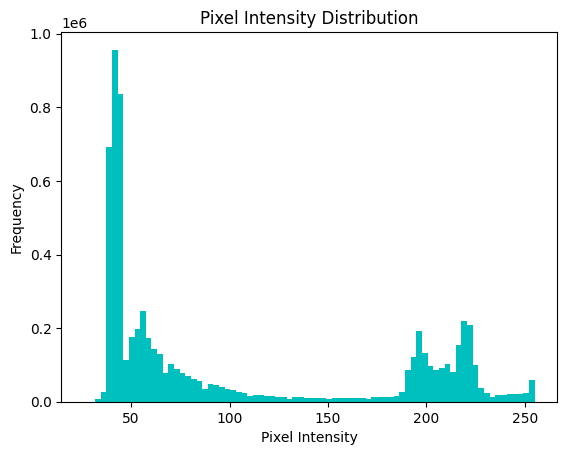

Further reduced stack shape: (104, 32, 32)
Number of voxels above threshold 100: 46345


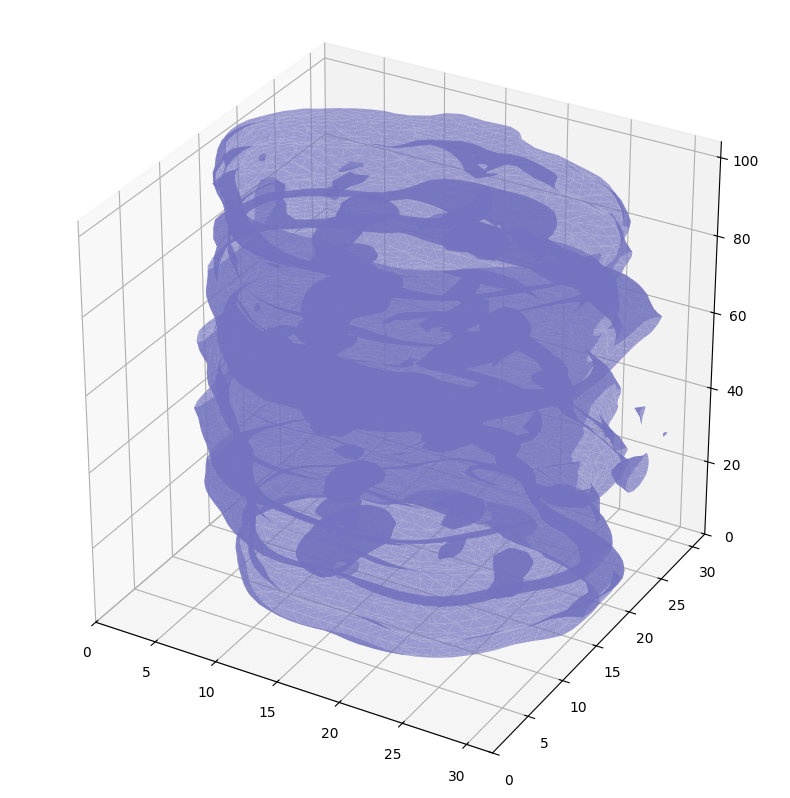

In [9]:
# Function for resampling
def resample(image, original_spacing, new_spacing=[1, 1, 1]):
    resize_factor = np.array(original_spacing) / np.array(new_spacing)
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape).astype(int)
    real_resize_factor = new_shape / image.shape
    new_spacing = np.array(original_spacing) / real_resize_factor

    resampled_image = scipy.ndimage.zoom(image, real_resize_factor, mode='nearest')
    return resampled_image, new_spacing


# Function to create a 3D plot with scaling
def plot_3d_with_scaling(image, threshold=50, spacing=None):
    """
    Create a 3D plot with scaling correction based on spacing
    """
    # Transposing the axes for correct display
    p = image.transpose(2, 1, 0)

    # Calculating the 3D surface
    verts, faces, _, _ = measure.marching_cubes(p, level=threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    # Creating the mesh
    mesh = Poly3DCollection(verts[faces], alpha=0.7)
    face_color = [0.45, 0.45, 0.75]  # Blue
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    # If spacing exists, calculate scaling
    if spacing is not None:
        ax.set_box_aspect([spacing[0], spacing[1], spacing[2]])  # Scaling correction

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()


# Defining the data path
base_path = "/root/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/"
categories = os.listdir(base_path)

# Choosing a category (e.g., "Malignant cases")
category_path = os.path.join(base_path, categories[0])
image_files = [f for f in os.listdir(category_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
image_files.sort()

# Loading all images into a 3D array with a fixed size
target_size = (128, 128)  # Resize images
image_stack = []
for file in image_files:
    img = Image.open(os.path.join(category_path, file)).convert("L")
    img_resized = img.resize(target_size)  # Uniform resizing
    image_stack.append(np.array(img_resized))

image_stack = np.stack(image_stack)  # Creating a 3D array

# Displaying a few frames as examples
for i in range(0, image_stack.shape[0], image_stack.shape[0] // 5):
    plt.imshow(image_stack[i], cmap="gray")
    plt.title(f"Frame {i}")
    plt.axis("off")
    plt.show()

# Defining original and desired spacings
original_spacing = [1, 1, 1]  # Change if there is more accurate information
new_spacing = [1, 1, 1]  # New spacings

# Resampling the image
pix_resampled, spacing = resample(image_stack, original_spacing, new_spacing)

# Printing the information after resampling
print("Shape before resampling:", image_stack.shape)
print("Shape after resampling:", pix_resampled.shape)

# Checking intensity ranges
min_intensity = pix_resampled.min()
max_intensity = pix_resampled.max()
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")

# Creating a histogram to choose an appropriate threshold
plt.hist(pix_resampled.flatten(), bins=80, color='c')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

# Choosing an intensity threshold based on the histogram
threshold = 100  # Example

if threshold < min_intensity or threshold > max_intensity:
    raise ValueError(f"Threshold {threshold} is out of range ({min_intensity}, {max_intensity}).")

# Further reducing the resolution
pix_resampled_small = pix_resampled[::4, ::4, ::4]  # Further resolution reduction
print("Further reduced stack shape:", pix_resampled_small.shape)

# Noise filtering with a Gaussian filter
pix_resampled_filtered = scipy.ndimage.gaussian_filter(pix_resampled_small, sigma=1)

# Checking the number of points above the threshold
num_voxels = np.sum(pix_resampled_filtered > threshold)
print(f"Number of voxels above threshold {threshold}: {num_voxels}")

# If the number of voxels above the threshold is still high, choose a higher threshold
if num_voxels > 1e6:  # Example: limit of one million points
    threshold += 50  # Increase the threshold to include fewer points
    print(f"Threshold increased to {threshold} to reduce voxel count.")

# Attempt to create a 3D plot
try:
    plot_3d_with_scaling(pix_resampled_filtered, threshold=threshold, spacing=new_spacing)
except RuntimeError as e:
    print(f"RuntimeError: {e}")
    print("Try lowering the threshold to include more voxels.")
